<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Week%203/Google%20Colab/Tugas_Week_3_CIFAR_10_Tensorflow_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from itertools import cycle

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Data Exploring

In [2]:
print("Training Images Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Images Shape:", X_test.shape)
print("Test Labels Shape:", y_test.shape)

Training Images Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Test Images Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)


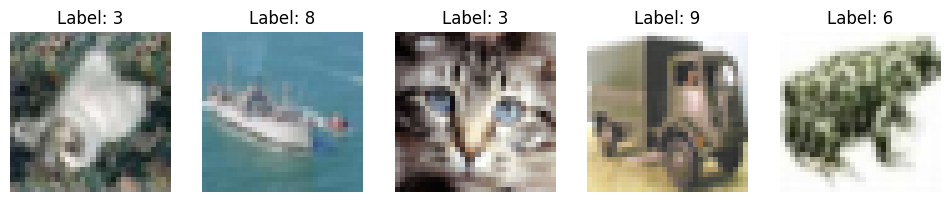

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
  idx = np.random.randint(0, len(X_train))
  axes[i].imshow(X_train[idx])
  axes[i].set_title(f"Label: {y_train[idx][0]}")
  axes[i].axis('off')
plt.show()

# Data Preprocessing

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

# CNN Model

In [6]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620,362 (2.37 MB)

 Trainable params: 620,362 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

history = model_cnn.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 180ms/step - accuracy: 0.3069 - loss: 1.8708 - val_accuracy: 0.5536 - val_loss: 1.2739
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 193ms/step - accuracy: 0.5456 - loss: 1.2602 - val_accuracy: 0.6324 - val_loss: 1.0259
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 180ms/step - accuracy: 0.6279 - loss: 1.0512 - val_accuracy: 0.6672 - val_loss: 0.9463
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 188ms/step - accuracy: 0.6799 - loss: 0.9140 - val_accuracy: 0.7062 - val_loss: 0.8468
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 183ms/step - accuracy: 0.7123 - loss: 0.8180 - val_accuracy: 0.7231 - val_loss: 0.8052
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 183ms/step - accuracy: 0.7433 - loss: 0.7345 - val_accuracy: 0.7356 - val_loss: 0.7694
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 188ms/step - accuracy: 0.7609 - loss: 0.6751 - val_accuracy: 0.7379 - val_loss: 0.7742
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.7848 -

In [9]:
test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.7896
Test Accuracy: 0.7257


In [10]:
y_pred_probs = model_cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


In [11]:
len(y_pred)

10000

In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[761  14  31  19  12  18   8   6  81  50]
 [ 15 851   0  10   1   8   7   0  17  91]
 [ 77  10 545  65  86  95  64  23  20  15]
 [ 19  12  42 513  38 253  59  20  15  29]
 [ 24   9  68  74 582  91  71  64  13   4]
 [  9   2  17 145  30 735  14  25  16   7]
 [  3   3  37  70  14  40 810   1   9  13]
 [ 11   5  27  36  44 102   7 739   4  25]
 [ 39  30   8   8   2   8   3   0 878  24]
 [ 27  70   3  15   4   8   4   5  21 843]]



Accuracy: 0.7257
Precision: 0.7307
Recall: 0.7257
F1 Score: 0.7244
ROC AUC Score: 0.9618


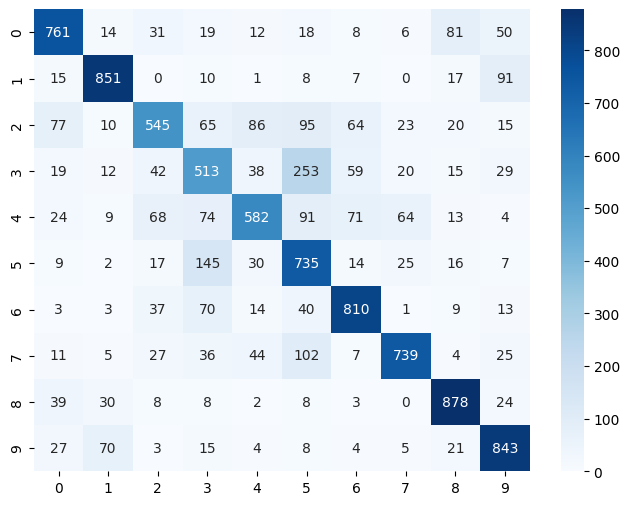

In [13]:
cnn_acc = accuracy_score(y_test, y_pred)
cnn_precision = precision_score(y_test, y_pred, average='weighted')
cnn_recall = recall_score(y_test, y_pred, average='weighted')
cnn_f1 = f1_score(y_test, y_pred, average='weighted')
cnn_roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

# Visualisasi dengan Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

print(f"\nAccuracy: {cnn_acc:.4f}\nPrecision: {cnn_precision:.4f}\nRecall: {cnn_recall:.4f}\nF1 Score: {cnn_f1:.4f}\nROC AUC Score: {cnn_roc_auc:.4f}")


Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


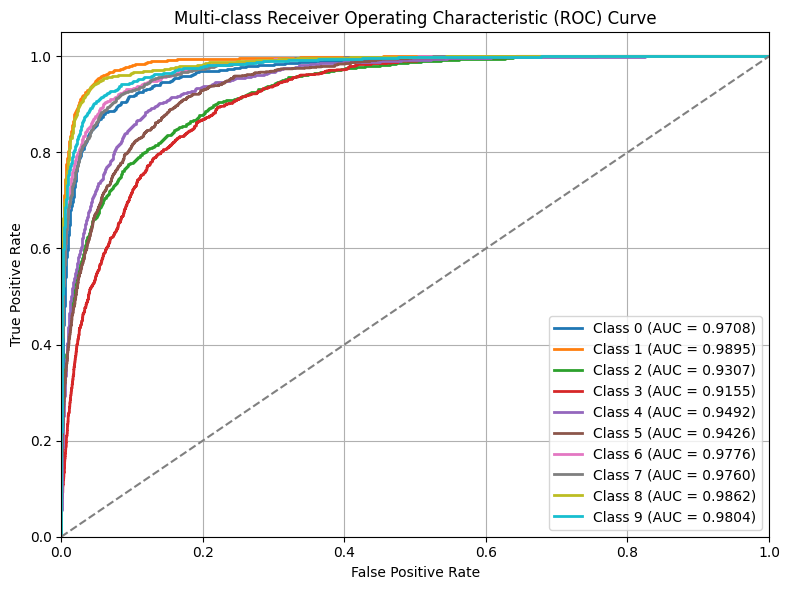

In [14]:
# Cek apakah probabilitas sudah benar
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

# Cek apakah jumlah kelas sesuai
n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

# Konversi ke One-vs-Rest
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Warna berbeda untuk tiap kelas
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(8, 6))

# Plot ROC untuk tiap kelas
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Garis referensi diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labeling dan layout
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analisis CNN Model

## 📊 Evaluasi Model CNN Tensorflow

### 🔢 Confusion Matrix
Confusion matrix menunjukkan distribusi prediksi benar dan salah dari model klasifikasi terhadap setiap kelas (0–9). Baris = label sebenarnya, kolom = prediksi model.

### 📈 Metrik Evaluasi
Berikut hasil evaluasi model:

- **Accuracy**: 0.7257  
  $$\text{Accuracy} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Seluruh Data}}$$

- **Precision**: 0.7307  
  $$\text{Precision} = \frac{TP}{TP + FP}$$
  Precision mengukur seberapa akurat model ketika memprediksi sebuah kelas (menghindari false positives).

- **Recall**: 0.7257
  $$\text{Recall} = \frac{TP}{TP + FN}$$
  Recall mengukur seberapa baik model dalam menemukan semua contoh yang benar (menghindari false negatives).

- **F1 Score**: 0.7244
  $$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
  Kombinasi harmonis antara precision dan recall.

- **ROC AUC Score**: 0.9618
  ROC AUC menunjukkan performa model dalam membedakan kelas secara keseluruhan. Nilai dekat 1 berarti sangat baik.

### ✅ Kesimpulan
Model ini memiliki performa cukup baik dengan **akurasi sekitar 72.5%** dan **AUC Score sangat tinggi** (0.9618) menandakan model mampu membedakan antar kelas dengan baik. F1 score juga cukup tinggi, menandakan keseimbangan antara precision dan recall.

Namun, masih ada beberapa kelas yang memiliki nilai prediksi silang cukup tinggi (misclassifications), terutama antara kelas 2, 3, dan 4.

# MLP Model

In [15]:
model_mlp = Sequential([
    Flatten(input_shape=(32, 32, 3)),       # Meratakan input gambar 32x32x3 jadi vektor 3072
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')         # Output 10 kelas
])

model_mlp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

history = model_mlp.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.1494 - loss: 2.2991 - val_accuracy: 0.2542 - val_loss: 2.0322
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.1819 - loss: 2.1152 - val_accuracy: 0.2592 - val_loss: 2.0075
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.2012 - loss: 2.0758 - val_accuracy: 0.2715 - val_loss: 2.0041
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.2108 - loss: 2.0613 - val_accuracy: 0.2610 - val_loss: 1.9890
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.2105 - loss: 2.0581 - val_accuracy: 0.2426 - val_loss: 2.0379
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.2162 - loss: 2.0570 - val_accuracy: 0.2784 - val_loss: 2.0164
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.2183 - loss: 2.0431 - val_accuracy: 0.2525 - val_loss: 2.0058


In [17]:
test_loss, test_accuracy = model_mlp.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.9818
Test Accuracy: 0.2631


In [18]:
y_pred_probs = model_mlp.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [19]:
cm_mlp = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_mlp)

Confusion Matrix:
[[331   2  29  10   4   4  15 218 116 271]
 [ 22  27   4  19   5   5  37 135  23 723]
 [ 91   3  83  27  27  17 153 484  11 104]
 [ 15  10  10 114   4  72 203 402   6 164]
 [ 29   5  85  17  35   1 191 532  12  93]
 [ 15   4  17 119   7 125 203 393  11 106]
 [  5   7  42  48  32  12 331 439   0  84]
 [ 18   5  34  22   9  10  89 627   5 181]
 [194   1   5  15   0  24  10  97 181 473]
 [ 22  12   1   8   1   6  20 123  30 777]]



Accuracy: 0.2631
Precision: 0.3255
Recall: 0.2631
F1 Score: 0.2204
ROC AUC Score: 0.7610


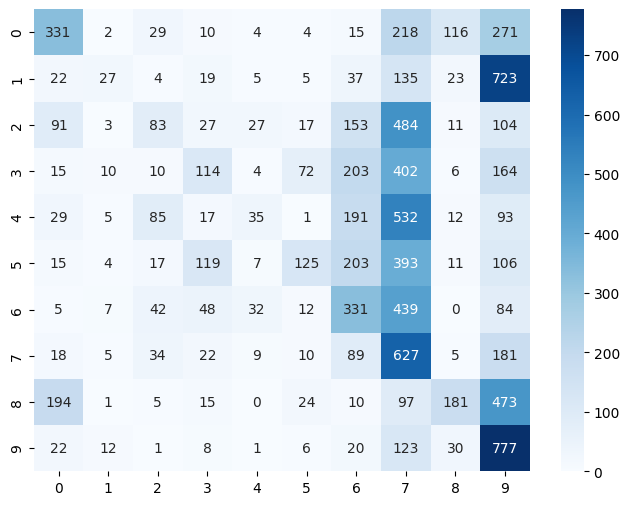

In [20]:
mlp_acc = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred, average='weighted')
mlp_recall = recall_score(y_test, y_pred, average='weighted')
mlp_f1 = f1_score(y_test, y_pred, average='weighted')
mlp_roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
# Visualisasi dengan Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

print(f"\nAccuracy: {mlp_acc:.4f}\nPrecision: {mlp_precision:.4f}\nRecall: {mlp_recall:.4f}\nF1 Score: {mlp_f1:.4f}\nROC AUC Score: {mlp_roc_auc:.4f}")

Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


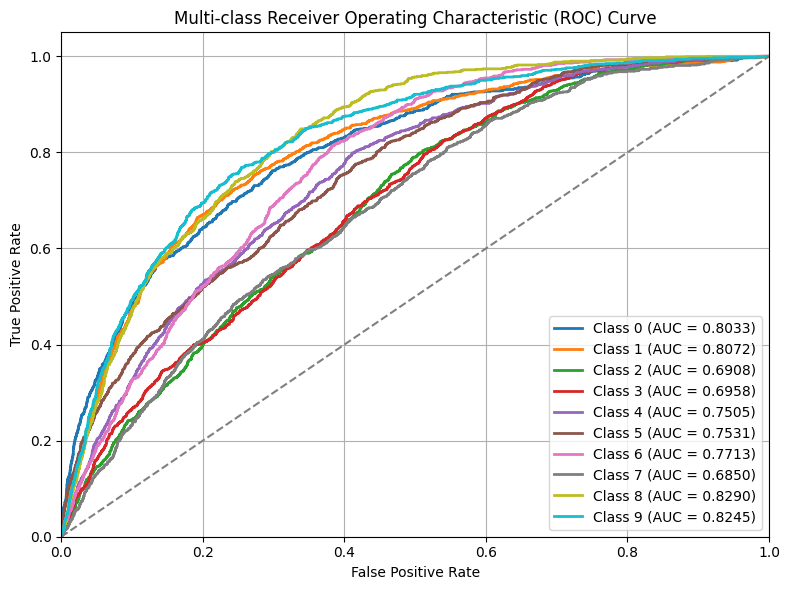

In [21]:
# Cek apakah probabilitas sudah benar
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

# Cek apakah jumlah kelas sesuai
n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

# Konversi ke One-vs-Rest
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Warna berbeda untuk tiap kelas
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(8, 6))

# Plot ROC untuk tiap kelas
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Garis referensi diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labeling dan layout
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analisis MLP Model

## 📊 Evaluasi Model CNN Tensorflow

### 🔢 Confusion Matrix
Confusion matrix menunjukkan distribusi prediksi benar dan salah dari model klasifikasi terhadap setiap kelas (0–9). Baris = label sebenarnya, kolom = prediksi model.

### 📈 Metrik Evaluasi
Berikut hasil evaluasi model:

- **Accuracy**: 0.2631
  $$\text{Accuracy} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Seluruh Data}}$$

- **Precision**: 0.3255
  $$\text{Precision} = \frac{TP}{TP + FP}$$
  Precision mengukur seberapa akurat model ketika memprediksi sebuah kelas (menghindari false positives).

- **Recall**: 0.2631
  $$\text{Recall} = \frac{TP}{TP + FN}$$
  Recall mengukur seberapa baik model dalam menemukan semua contoh yang benar (menghindari false negatives).

- **F1 Score**: 0.2204
  $$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
  Kombinasi harmonis antara precision dan recall.

- **ROC AUC Score**: 0.7610
  ROC AUC menunjukkan performa model dalam membedakan kelas secara keseluruhan. Nilai dekat 1 berarti sangat baik.

### ✅ Kesimpulan
Model ini memiliki performa buruk dengan **akurasi sekitar 26.3%** dan **AUC Score cukup rendah** (0.7610) menandakan model kurang mampu membedakan antar kelas dengan baik. F1 score juga sangat rendah, menandakan ketidakseimbangan antara precision dan recall.
